<a href="https://colab.research.google.com/github/tr3nt-tayl0r/CIMIS/blob/main/colabs/graphs/delta_ETo_ECDF_by_station.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/tr3nt-tayl0r/CIMIS.git

Cloning into 'CIMIS'...
remote: Enumerating objects: 11062, done.
remote: Counting objects: 100% (601/601), done.
remote: Compressing objects: 100% (561/561), done.
remote: Total 11062 (delta 69), reused 536 (delta 37), pack-reused 10461 (from 1)
Receiving objects: 100% (11062/11062), 665.21 MiB | 11.04 MiB/s, done.
Resolving deltas: 100% (2248/2248), done.
Updating files: 100% (4165/4165), done.


In [ ]:
import glob
import os
import sys
import datetime
import numpy as np
import pandas as pd
import json
import requests
import datetime
import matplotlib.pyplot as plt
from google.colab import userdata


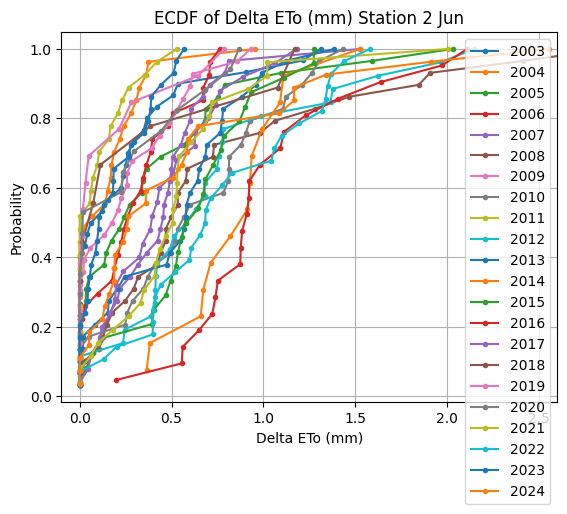

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF

station_ids = [2]

for id in station_ids:
  dir = "/content/CIMIS/CIMIS_Project_Data/CIMIS_daily_corr_data/"
  file = f'station_id{id}_cimis_daily_corr.csv'
  df = pd.read_csv(f'{dir}{file}')
  df['Date'] = pd.to_datetime(df.Date)
  df.set_index(pd.to_datetime(df.Date),inplace=True)
  df = df[(df['Date'].dt.month == 6)]

  years = list(range(2003,2025))
  for year in years:
    df_yr = df[(df['Date'].dt.year == year)]
    df_yr = df_yr.dropna(subset=['d_ETo'])
    ecdf = ECDF(df_yr['d_ETo'])
    plt.xlim(-0.1, 2.6)
    plt.xticks([0, 0.5, 1.0, 1.5, 2.0, 2.5])

    plt.plot(ecdf.x, ecdf.y, marker='.', linestyle='-')
    plt.xlabel('Delta ETo (mm)')
    plt.ylabel('Probability')
    plt.title(f'ECDF of Delta ETo (mm) Station {id} Jun')
    plt.grid(True)
    plt.legend(years)
